# First model
The goal of this model is to establish the pattern of importing image data and building a simple model.

Model performance is not a priority, that comes later.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from scipy import misc
import matplotlib.pyplot as plt

In [5]:
IMAGE_PATH = 'data/images/capture/'

In [6]:
data = pd.DataFrame.from_csv('data/labels/rugby_image_labels_2.csv')

In [7]:
data.head()

,y
file_name,
1491257473.62.jpg,327.0
1491257474.29.jpg,336.0
1491257474.83.jpg,367.0
1491257475.45.jpg,392.0
1491257476.09.jpg,401.0


In [16]:
test_img = misc.imread(IMAGE_PATH + data.iloc[0].name,flatten=True)

In [19]:
test_img.shape

(480, 640)

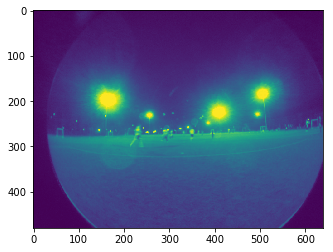

In [18]:
plt.imshow(test_img)
plt.show()

In [24]:
get_rows = 100
# get sizes of image data 
m = data.shape[0]
image_size = test_img.shape
# total size of numpy volume
data_size = [*image_size, get_rows]

In [25]:
# fill numpy volume with image data
data_np = np.zeros(data_size)
count = 0
for i, v in data_2[:get_rows].iterrows():
    if not(count % 100):
        print(count)
    data_np[:,:,count] =  misc.imread(IMAGE_PATH + i, flatten=True)
    count += 1

0


In [26]:
data_np.shape

(480, 640, 100)

In [10]:
# np.save('data/numpy_images/d1.npy', data_np)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(480, 640, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal'))

In [35]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))